# Assignment 1-2: Data Collection Using Web APIs

## Objective

Many Websites (such as Twitter, Yelp, Spotify) provide free APIs to allow users to access their data. *API wrappers* simplify the use of these APIs by wrapping API calls into easy-to-use Python functions. At SFU, we are developing a unified API wrapper, called [DataPrep.Connector](https://docs.dataprep.ai/user_guide/connector/introduction.html#userguide-connector), which offers a unified programming interface to collect data from a variety of Web APIs.

In this assignment, you will learn the following:

* How to ask insightful questions about data
* How to collect data from Web APIs using DataPrep.Connector

**Requirements:**

1. Please use [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) rather than spark.DataFrame to manipulate data.

2. Please follow the python code style (https://www.python.org/dev/peps/pep-0008/). If TA finds your code hard to read, you will lose points. This requirement will stay for the whole semester.

## Preliminary

DataPrep.Connector is very easy to learn. By watching this 10-min [PyData Global 2020 talk](https://www.youtube.com/watch?v=56qu-0Ka-dA), you should be able to know how to use it. 

If you want to know more, below are some other useful resources.

* [Quick Introduction](https://github.com/sfu-db/dataprep#connector)
* [User Guide](https://sfu-db.github.io/dataprep/user_guide/connector/connector.html) 
* [Examples](https://github.com/sfu-db/dataprep/tree/develop/examples)
* [Fetch and analyze COVID-19 tweets using DataPrep](https://www.youtube.com/watch?v=vvypQB3Vp1o)

## Overview

This is a **group** assignment. Please check your group in this [PDF file](https://coursys.sfu.ca/2022sp-cmpt-733-g1/pages/Web-API-Assignment/view).

To do this assignment, your group needs to go through four steps:

1. Select a new Web API that is not listed on https://github.com/sfu-db/APIConnectors. 
2. Create a configuration file for the API (see tutorials at [link1](https://github.com/sfu-db/APIConnectors/blob/develop/CONTRIBUTING.md#add-configuration-files) and [link2](https://github.com/sfu-db/EZHacks-tutorial/blob/master/2.%20Tutorial.ipynb)). 
3. Come up with four questions about the API. 
4. Write code to answer these questions one by one.

For Step 3, please make sure your questions are **good**.

## What are "good questions"?

Please use the following to judge whether your questions are good or not.

1. Good questions need to be useful. That is, they are common questions asked about the API.
2. Good questions need to be diverse. That is, they cover different aspects of the API. 
3. Good questions have to cover different difficulty levels. That is, it consists of both easy and difficult questions,  where the difficulty can be measured by the number of lines of code or the number of input parameters.

The following shows four good questions about the Yelp API. The corresponding code can be found at this [link](https://github.com/sfu-db/DataConnectorConfigs#yelp----collect-local-business-data).

* Q1. What's the phone number of Capilano Suspension Bridge Park?
* Q2. Which yoga store has the highest review count in Vancouver?
* Q3. How many Starbucks stores are in Seattle and where are they?
* Q4. What are the ratings for a list of restaurants?

**Why are they useful?**
* Q1 is useful because "Capilano Suspension Bridge Park" is one of the most popular tourist attractions in Vancouver.
* Q2 is useful because a yoga fan wants to find out the most popular yoga store in Vancouver. 
* Q3 is useful because Starbucks was founded in Seattle.
* Q4 is useful because people often rely on yelp ratings to decide which restaurant to go to.

**Why are they diverse?**

This is because the [code](yelp-code.png) written to answer them has different inputs or outputs.
* Q1 takes `term` and `location` as input and returns 1 record with attributes `name` and `phone` 
* Q2 takes `categories`, `location`, and `sort_by` as input and returns 1 record with attributes `name` and `review_count`
* Q3 takes `term` and `location` as input and returns n records with attributes `name`, `address`, `city`, `state`, `country`, `zipcode`
* Q4 takes a list of retarurant `names` as input and return n records with attributes `name`, `rating`, `city`

**Why are they more and more difficult?**
* Q1 (4 lines of code, 2 query parameters)
* Q2 (4 lines of code, 3 query parameters)
* Q3 (5 lines of code, 2 query parameters)
* Q4 (11 lines of code, 2 query parameters)

Please note that you have to use DataPrep.Connector to get data from the Web API. If DataPrep.Connector cannot meet your needs, please post your questions on Slack (Channel: Assignment 1). We will help you. 

## Now, it's your turn. :) 

Please write down your questions and the corresponding code for your assigned API. 

In [1]:
# Import Statements
from dataprep.connector import connect
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Provide your API key here for TAs to reproduce your results
API_key = "8D73AS9T8U2JKXRP"

# Connecting to Web API using dataprep
connect_api = connect("./config", _auth={'access_token': API_key}, _concurrency=3)

NumExpr defaulting to 4 threads.


### Q1.  When was the U.S. GDP growing the fastest?

In [2]:
# Write your code
realgdp_df = await connect_api.query('realgdp',function="REAL_GDP",interval="annual")

realgdp_df["value"]=pd.to_numeric(realgdp_df["value"])
realgdp_df["value"][0]
res=realgdp_df.set_index("date").pct_change(periods=-1)

print('Year:' + res.idxmax().item() )
print('GDP growth rate:', res["value"].max())

Year:1942-01-01
GDP growth rate: 0.18886579936279713


### Q2. What is the growth_rate of last 4 years sessions of a given company? (e.g. AMZN)

In [3]:
# Write your code
df = await connect_api.query('balance',function='BALANCE_SHEET',symbol="AMZN")

growth_rate_list, year = [],[]
company_df = pd.DataFrame(columns=["Year","Growth Rate"])

for i in range(0,df.shape[0]-1):
    growth_rate_list.append(((float(df['totalAssets'][i]) - float(df['totalAssets'][i+1]))/float(df['totalAssets'][i+1])*100))
    year.append(datetime.strptime(df['fiscalDateEnding'][i], "%Y-%m-%d").year)

company_df['Year'],company_df['Growth Rate'] = year,growth_rate_list
print(company_df)

   Year  Growth Rate
0  2020    42.596161
1  2019    38.488023
2  2018    23.865661
3  2017    57.442268


### Q3. Between 1948 and 2021 which year had the highest Average Unemployment Rate in the US ?

      unemployment rate
year                   
1982           9.708333


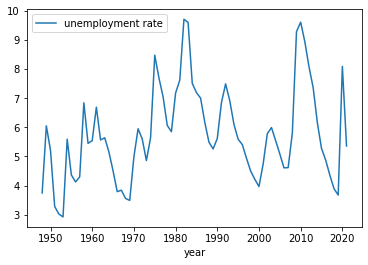

In [4]:
# Write your code
#Here the unemployment rate represents the number of unemployed as a percentage of the labor force.
#using the existing connect_api variable
us_unemployment_df = await connect_api.query('unemployment',function='UNEMPLOYMENT') 

us_unemployment_df["unemployment rate"] = pd.to_numeric(us_unemployment_df["value"])
us_unemployment_df = us_unemployment_df.drop(columns=['value'])
us_unemployment_df["date"] = pd.to_datetime(us_unemployment_df['date'], format='%Y-%m-%d')
us_unemployment_df['year'] = pd.DatetimeIndex(us_unemployment_df['date']).year  

yearly_average_unemployment = us_unemployment_df.groupby(['year']).mean()
condition = yearly_average_unemployment['unemployment rate'] == yearly_average_unemployment['unemployment rate'].max()

yearly_average_unemployment.plot(kind = 'line')
print(yearly_average_unemployment[condition])

### Q4. What are the 5 years where the inflation was the most and the least in the US

In [5]:
## Write your code

# Which 5 years has the most and least inflation in the US
inflation_df = await connect_api.query('inflation',function="INFLATION")
inflation_df['value'] = pd.to_numeric(inflation_df['value'])

# 5 years with lowest inflation rates
low_inflation_df = inflation_df.sort_values('value').head(5)
print("5 years with lowest inflation rates in US:")
for index, year in low_inflation_df.iterrows():
    print("Year: ", year['date'].split('-')[0], 
          " Inflation in %: ", round(year['value'], 2))

# 5 years with highest inflation rates
high_inflation_df = inflation_df.sort_values('value', ascending=False).head(5)
print("\n5 years with highest inflation rates in US:")
for index, year in high_inflation_df.iterrows():
    print("Year: ", year['date'].split('-')[0], 
          " Inflation in %: ", round(year['value'], 2))

5 years with lowest inflation rates in US:
Year:  2009  Inflation in %:  -0.36
Year:  2015  Inflation in %:  0.12
Year:  1961  Inflation in %:  1.07
Year:  1962  Inflation in %:  1.2
Year:  2020  Inflation in %:  1.23

5 years with highest inflation rates in US:
Year:  1980  Inflation in %:  13.55
Year:  1979  Inflation in %:  11.25
Year:  1974  Inflation in %:  11.05
Year:  1981  Inflation in %:  10.33
Year:  1975  Inflation in %:  9.14


## Treasury Yield - U.S

Treasure Yield is seen as a sign of investor sentiment about the direction of economy and it serves as a vital economic benchmark. The higher the yields on U.S. Treasuries, the more confidence investors have in the economic outlook.
 
## Q5. What are the yield values for pre-covid, covid(2020) and post-covid scenario? Is the economy of US improving?

In [6]:
# Write your Code
treasure_yield_df = await connect_api.query("treasury", function="TREASURY_YIELD")

treasure_yield_df["value"] = pd.to_numeric(treasure_yield_df["value"])
treasure_yield_df["date"] = pd.to_datetime(treasure_yield_df['date'])
treasure_yield_df["year"]  = treasure_yield_df["date"].dt.year
yearly_ty_value = treasure_yield_df.groupby('year').mean()

print("TY Value before Covid for US:\n")
year_range = [i for i in range(2015, 2020)]
print(yearly_ty_value[yearly_ty_value.index.isin(year_range)])

print("\nTY during Covid for US (2020):\n")
print(yearly_ty_value[yearly_ty_value.index == 2020])

print("\nThe economy of US is recovering because of the increase in TY index value for 2021:\n")
print(yearly_ty_value[yearly_ty_value.index == 2021])

TY Value before Covid for US:

         value
year          
2015  2.135833
2016  1.841667
2017  2.330000
2018  2.910000
2019  2.144167

TY during Covid for US (2020):

         value
year          
2020  0.894167

The economy of US is recovering because of the increase in TY index value for 2021:

       value
year        
2021  1.4425


## Submission

Complete this notebook, rename it to `A1-2-[WEB API Name].ipynb`, and submit it along with your config files to the CourSys activity `Assignment 1 - Part 2`. For example, if your group works on Yelp, then **every member of your group** needs to submit the same notebook named `A1-2-Yelp.ipynb` and the config files named `config.zip`.